## 2. Гамильтониан Тависа-Каммингса. Два атома в оптической полости

<b>Задача:</b>
<em>Решить задачу Коши для уравнения Шредингера с гамильтонианом
Тависа-Каммингса в RWA приближении для системы 2 атомов в оптической
полости для произвольного начального условия с общей энергией $\hbar \omega$.
Объяснить полученное решение.</em>

<b>Выпишем гамильтониан Тависа-Каммингса в приближении RWA</b> для $N_a$ атомов в одной оптической полости:

$H_{TC}^{RWA} = \hbar \omega a^\dagger a + \hbar \omega \sum_{i=1}^{N_a} \sigma^\dagger_i \sigma_i + g a^\dagger \sum_{i=1}^{N_1} \sigma_i + g a \sum_{i=1}^{N_1} \sigma_i^\dagger $

Как и в случае гамильтониана Джейнса-Каммингса, в приближении RWA энергия сохраняется. Поэтому снова можно ожидать, что гамильтониан Тависа-Каммингса можно записать в блочно-диагональном виде, а пространство квантовых состояний распадется в пряму сумму инвариантных подпространств $\mathcal{H}_n$, каждое из которых соответствует энергии $E = \hbar \omega n$.

<b>Посмотрим, как устроен базисный набор.</b> Атомы могут принимать только состояния $|0>$ и $|1>$, а состояния поля характеризуются любыми неотрцательными числами. Поэтому базисные функции выглядят так:

$\chi = |n;m_1m_2>$

В приближении RWA для заданной общей энергии $E = \hbar \omega n$ могут существовать максимум 4 состояния при $n \ge 2$:

$|n;00>$, $|n-1;01>$, $|n-1;10>$, $|n-2;11>$

При $n=0$ имеем только одно базисное состояние $|0;00>$, а при $n=1$ - три состояния $|1;00>$, $|0;10>$ и $|0;01>$.

<b>Правила вычисления матричных элементов просты:</b>

* на диагонали ставятся $H_{n,m_1m_2;n,m_1m_2} = \hbar \omega (n+m_1+m_2)$;

* недиагональные элементы равны нулю, если базисные функции отличаются больше, чем на один фотон;

* матричные элементы операторов $a^\dagger\sigma_i$ и $a \sigma_i^\dagger$ могут быть факторизованы:

$<n;m_1m_2|a^\dagger\sigma_i|n';m_1'm_2'> = <n|a^\dagger|n'> <m_1m_2|\sigma_i|m_1'm_2'>$

$<n;m_1m_2|a\sigma^\dagger_i|n';m_1'm_2'> = <n|a|n'> <m_1m_2|\sigma^\dagger_i|m_1'm_2'>$

* матричные элементы от операторов $\sigma_i$ и $\sigma_i^\dagger$ равны 1, если строки $m_1m_2$ и $m'_1m'_2$ отличаются друг от друга только в $i$-й позиции, при этом оператор уничтожения (рождения) действует в этой позиции на единицу (ноль). Во всех остальных случаях они равны нулю;

* матричные элементы от полевых оператор вычисляются по формулам:

$<n|a^\dagger|n'> = \sqrt{n} \delta_{n,n'+1}$

$<n|a|n'> = \sqrt{n+1} \delta_{n,n'-1}$

Описанные правила можно применять к системам с произвольным числом атомов в полости.

<b>Рассмотрим частный случай $E = \hbar \omega$.</b>

Нетрудно выписать матрицу гамильтониана $H_{TC}^{RWA}$ в базисе векторов $|1;00>$, $|0;10>$ и $|0;01>$:

$H = \left( \begin{array}{ccc} \hbar \omega & g & g \\ g & \hbar \omega & 0 \\ g & 0 & \hbar \omega \end{array} \right)$

Задачу можно решить аналитически, для этого достаточно решить характеристическое уравнение и найти корни:

$E_1 = \hbar \omega - \sqrt{2}g$

$E_2 = \hbar \omega$

$E_3 = \hbar \omega + \sqrt{2}g$

Чтобы построить графики, решим теперь задачу численно, приняв $\hbar \omega = 1$, $g = 0.01$ (чтобы считать корректным приближение RWA):

In [1]:
from math import *
import numpy as np
import numpy.linalg as linalg

g = 0.01
H = np.zeros((3,3))

# diagonal
H[0,0] = 1.0
H[1,1] = 1.0
H[2,2] = 1.0
# off-diagonal
H[0,1] = g
H[0,2] = g
H[1,0] = g
H[2,0] = g

def eigensolver(H):
    e, v = linalg.eig(H)
    idx = e.argsort()[::1]   
    e = e[idx]
    v = v[:,idx]
    return e, v

E, v = eigensolver(H)
print('Energies:')
print(E)
print('Vectors (column-wise):')
print(v)

Energies:
[0.98585786 1.         1.01414214]
Vectors (column-wise):
[[ 7.07106781e-01 -1.57009246e-14  7.07106781e-01]
 [-5.00000000e-01 -7.07106781e-01  5.00000000e-01]
 [-5.00000000e-01  7.07106781e-01  5.00000000e-01]]


Теперь необходимо найти коэффициенты $\lambda_j$ для заданных заселенностей базисных векторов в момент времени $t=0$:

In [2]:
# b - required composition of Psi(0) -- in term of basis states
# v - eigenvectors
def calc_lambda(b, v):
    psi_0 = np.array(b)
    lam = linalg.solve(v, psi_0)
    return lam

# calculates Psi(t) -- in term of basis states
def psi_t(t, basis_dim, lam, E, C):
    psi = np.zeros((basis_dim), dtype=np.cdouble)
    
    for alpha in range(0,basis_dim):
        coef_nm_re = 0.0
        coef_nm_im = 0.0
        for j in range(0,basis_dim):
            coef_nm_re += lam[j] * C[alpha,j] * cos(E[j]*t)
            coef_nm_im += - lam[j] * C[alpha,j] * sin(E[j]*t)
        psi[alpha] = coef_nm_re + coef_nm_im * 1j

    return psi

lam = calc_lambda([1,0,0], v)
print('lambda = ', lam)
print('Psi(0) = ', psi_t(0, 3, lam, E, v))

lambda =  [ 7.07106781e-01 -2.29373984e-16  7.07106781e-01]
Psi(0) =  [ 1.00000000e+00+0.j  1.11022302e-16+0.j -2.22044605e-16+0.j]


Наконец, вычисляем на сетке волновую функцию $|\Psi(t)>$ и строим графики всех заселенностей.

In [3]:
t = np.linspace(0, 1000, 100)
psi = np.zeros((len(t), 3), dtype=np.cdouble)
for i,ti in enumerate(t):
    psi[i,:] = psi_t(ti, 3, lam, E, v)

n_1_00 = abs(psi[:,0])**2
n_0_10 = abs(psi[:,1])**2
n_0_01 = abs(psi[:,2])**2

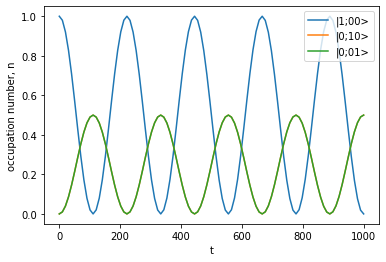

In [4]:
import matplotlib.pyplot as plt

plt.plot(t, n_1_00, label='|1;00>')
plt.plot(t, n_0_10, label='|0;10>')
plt.plot(t, n_0_01, label='|0;01>')
plt.legend(loc='upper right')
plt.xlabel('t')
plt.ylabel('occupation number, n')
plt.show()

Получились те же осцилляции Раби. Фотон попеременно то оказывается свободным, то поглощается одновременно двумя атомами (при этом они переходят в возбужденное состояние одновременно). Вообще говоря, никто не мешает задать другое начальное состояние - пусть будет возбужден только один из двух атомов:

lambda =  [-0.5        -0.70710678  0.5       ]
Psi(0) =  [ 5.55111512e-17+0.j  1.00000000e+00+0.j -8.32667268e-17+0.j]


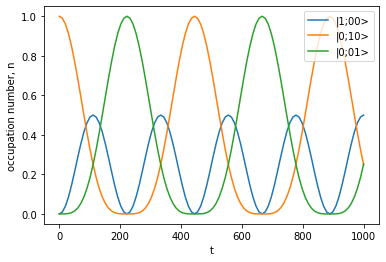

In [5]:
def plot_dynamics(dim, init_occupations, energies, eigvecs, bas_fun_labels, tmax, dt):
    lam = calc_lambda(init_occupations, eigvecs)
    print('lambda = ', lam)
    print('Psi(0) = ', psi_t(0, dim, lam, energies, eigvecs))

    t = np.linspace(0, tmax, int(tmax/dt))
    psi = np.zeros((len(t), dim), dtype=np.cdouble)
    for i,ti in enumerate(t):
        psi[i,:] = psi_t(ti, dim, lam, energies, eigvecs)

    for i in range(0,dim):
        n_i = abs(psi[:,i])**2
        plt.plot(t, n_i, label=bas_fun_labels[i])

    plt.legend(loc='upper right')
    plt.xlabel('t')
    plt.ylabel('occupation number, n')
    plt.show()

basis_functions = ['|1;00>', '|0;10>', '|0;01>']
plot_dynamics(3, [0,1,0], E, v, basis_functions, 1000, 10)

<b>Случай произвольного $n \ge 2$ ($E = \hbar \omega n$)</b>.

Здесь приходится работать с базисными векторами $|n;00>$, $|n-1;10>$, $|n-1;01>$, $|n-2;11>$. Матрица гамильтониана в общем виде:

$H_n = \left( \begin{array}{cccc} \hbar \omega n & g\sqrt{n} & g\sqrt{n} & 0 \\ g\sqrt{n} & \hbar \omega n & 0 & g\sqrt{n-1} \\ g\sqrt{n} & 0 & \hbar \omega n & g\sqrt{n-1} \\ 0 & g\sqrt{n-1} & g\sqrt{n-1} & \hbar \omega n \end{array} \right)$

Искать решение аналитически можно, но определитель четвертого порядка вручную считать не очень хочется. Поэтому воспользуемся численным методом:

In [6]:
g = 0.01
n = 2
H = np.zeros((4,4))

# diagonal
H[0,0] = n
H[1,1] = n
H[2,2] = n
H[3,3] = n
# off-diagonal
H[0,1] = g*sqrt(n)
H[0,2] = g*sqrt(n)
H[1,0] = g*sqrt(n)
H[2,0] = g*sqrt(n)
H[1,3] = g*sqrt(n-1)
H[2,3] = g*sqrt(n-1)
H[3,1] = g*sqrt(n-1)
H[3,2] = g*sqrt(n-1)

E, v = eigensolver(H)
print('Energies:')
print(E)
print('Vectors (column-wise):')
print(v)

Energies:
[1.9755051 2.        2.        2.0244949]
Vectors (column-wise):
[[ 5.77350269e-01 -5.77350269e-01  3.33438499e-04 -5.77350269e-01]
 [-5.00000000e-01 -1.33508935e-14 -7.07106663e-01 -5.00000000e-01]
 [-5.00000000e-01 -1.49049618e-14  7.07106663e-01 -5.00000000e-01]
 [ 4.08248290e-01  8.16496581e-01 -4.71553248e-04 -4.08248290e-01]]


Здесь мы наконец получили ситуацию с двумя вырожденными состояниями. Посмотрим на динамику. Заселим сначала только базисное состояние с двумя фотонами:

lambda =  [ 5.77350269e-01 -5.77350269e-01  4.85788378e-17 -5.77350269e-01]
Psi(0) =  [ 1.00000000e+00+0.j  0.00000000e+00+0.j  1.66533454e-16+0.j
 -5.55111512e-17+0.j]


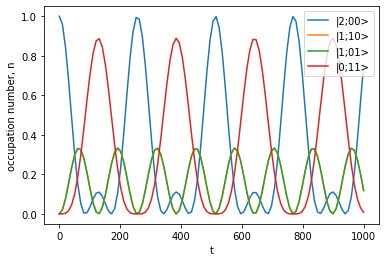

In [7]:
basis_functions = ['|2;00>', '|1;10>', '|1;01>', '|0;11>']
plot_dynamics(4, [1,0,0,0], E, v, basis_functions, 1000, 10)

Теперь попробуем стартовать из состояния с одним возбужденным атомом и одним фотоном:

lambda =  [-5.00000000e-01 -4.08377160e-04 -7.07106899e-01 -5.00000000e-01]
Psi(0) =  [ 0.00000000e+00+0.j  1.00000000e+00+0.j  5.55111512e-17+0.j
 -2.77555756e-17+0.j]


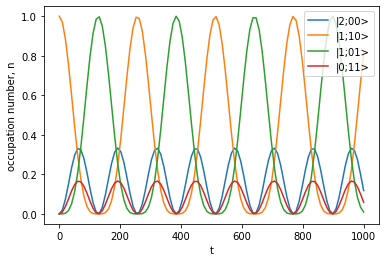

In [8]:
plot_dynamics(4, [0,1,0,0], E, v, basis_functions, 1000, 10)

И наконец, начнем с состояния, в котором нет фотонов, а оба атома возбуждены:

lambda =  [ 4.08248290e-01  8.16496581e-01  1.35545997e-15 -4.08248290e-01]
Psi(0) =  [ 0.00000000e+00+0.j -2.77555756e-17+0.j  5.55111512e-17+0.j
  1.00000000e+00+0.j]


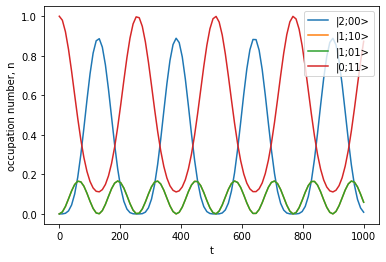

In [9]:
plot_dynamics(4, [0,0,0,1], E, v, basis_functions, 1000, 10)